In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
from utils import *
from algorithms import bfs, a_star
import genetic_algorithm

In [3]:
#!python -m minihack.scripts.env_list

Agent position: (14, 1)
Target position: (9, 14)
[[(14, 1), (13, 1), (13, 0), (14, 0)], [(14, 1), (15, 1)], [(14, 1), (13, 1), (12, 1), (11, 1), (11, 2), (10, 2), (9, 2), (9, 3), (8, 3), (8, 2), (8, 1), (8, 0), (7, 0), (7, 1), (7, 2)], [(14, 1), (14, 2), (13, 2), (13, 1)], [(14, 1), (14, 2), (15, 2), (16, 2), (16, 1), (17, 1), (17, 2)], [(14, 1), (14, 0), (15, 0), (15, 1)], [(14, 1), (15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (16, 6)], [(14, 1), (15, 1), (15, 2), (15, 3)], [(14, 1), (14, 2)], [(14, 1), (13, 1)]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Exception: x and y can't change at the same time. oblique moves not allowed!

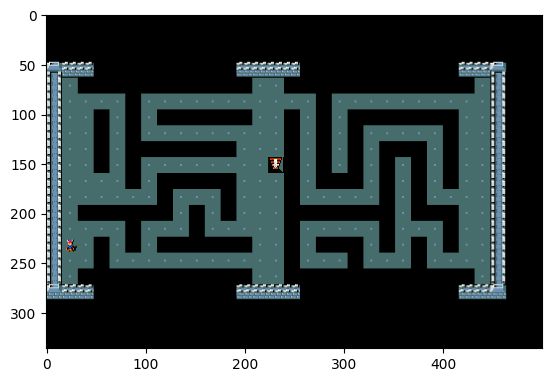

In [6]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
state = env.reset()

coordinates = [500, 500]

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

# Starting of the simulation
population_size = 10
step_limit = 20
population = genetic_algorithm.generate_initial_population(game_map, start, target, population_size, step_limit)

print(population)

path = genetic_algorithm.genetic_algorithm(game_map, start, target, population)
#path = bfs(game_map, start, target)

actions = actions_from_path(start, path[1:])

print(game_mex)

image = plt.imshow(game[:coordinates[0], :coordinates[1]])
for action in actions:
    s, _, done, _ = env.step(action)  # `done` say to us when the simulation is over
    image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])
    
    
    # If the simulation is done
    if done:
        # If player's hp are equal to 0 it means that he is dead
        if hp == 0: 
            display_game_over()
            break  # Interrupt the smulation

        # Else you have won    
        display_victory()
        break  # Interrupt the smulation


    # Update the game visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)
    